<a href="https://colab.research.google.com/github/whatsupabhijit/py_rambling/blob/master/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# import the data into numpy array
# Data Source: Assignment1_Q4_data.txt

data = np.loadtxt('https://raw.githubusercontent.com/whatsupabhijit/py_rambling/master/basicDeepDL/Assignment1_Q4_data.txt')
print (data)
print (data[0][0]) 
data.shape

[[-1.366   -0.16561]
 [ 0.21512  0.49609]
 [-0.31929 -0.92646]
 ...
 [ 9.2897  10.518  ]
 [ 8.427    9.0564 ]
 [ 8.0061   7.5711 ]]
-1.366


(1000, 2)

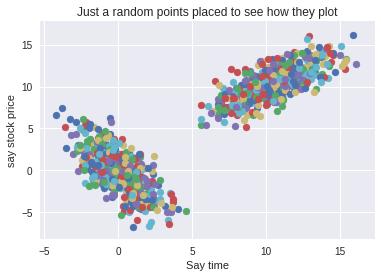

In [51]:
# Actually wrong way to show plot. 
# Because even though the plot shows there is some boundary between the two sections 
# it does not necessarily give us the information that points belonging to class A 
# is not present in class B region and vice versa.

plt.xlabel('Say time')
plt.ylabel('say stock price')
plt.title('Just a random points placed to see how they plot')

for i in range(1000):
  x = data[i][0]
  y = data[i][1]
  plt.scatter(x,y)

plt.show()

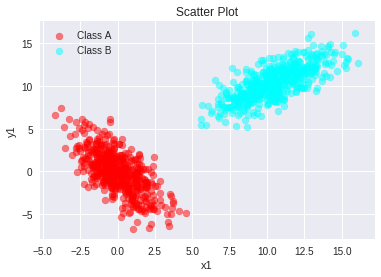

In [52]:
#Better way to show the plot


#its given in the question is first 500 points belong to class A and next 500 ponits belong to class B 
classA = data[:500]
classB = data[500:]

plt.scatter(classA[:, 0], classA[:, 1], c='red', alpha=0.5, label = 'Class A')
plt.scatter(classB[:, 0], classB[:, 1], c='cyan', alpha=0.5, label = 'Class B')

plt.title('Scatter Plot')
plt.xlabel('x1')
plt.ylabel('y1')

plt.legend()
plt.show()

In [53]:
# Perceptron algorithm starts here

#initialize the weights
#Note that the there are 3 points added for 2D plane as the first one denotes threshold

w = np.array([0., -1., 2.], dtype='float64')   

# Now we need to put x0 as 1 (because Sum(w(i) * x(i)) > 0 means you have assumed w(0) = -b and x(0) = 1)
temp = np.full((1000, 1), fill_value = 1, dtype='float64')

# So fixing the data part by adding x(0) values
data = np.hstack((temp, data))
data

array([[ 1.     , -1.366  , -0.16561],
       [ 1.     ,  0.21512,  0.49609],
       [ 1.     , -0.31929, -0.92646],
       ...,
       [ 1.     ,  9.2897 , 10.518  ],
       [ 1.     ,  8.427  ,  9.0564 ],
       [ 1.     ,  8.0061 ,  7.5711 ]])

Finished All Points Without updating WEIGHTS
Finally Converged after 1000 times
[17.       -3.98013  -2.633782]


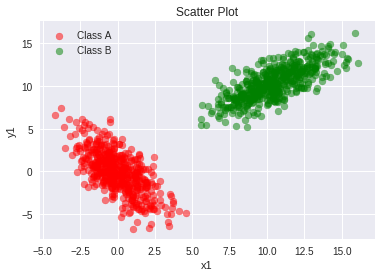

array([17.      , -3.98013 , -2.633782])

In [65]:
#its given in the question is first 500 points belong to class A and next 500 ponits belong to class B 
def wdotx(w, x):
  return (w[0]*x[0] + w[1] * x[1] + w[2] * x[2])

def plot_classes():
  plt.scatter(classA[:, 0], classA[:, 1], c='red'  , alpha=0.5, label = 'Class A')
  plt.scatter(classB[:, 0], classB[:, 1], c='green', alpha=0.5, label = 'Class B')
  plt.title('Scatter Plot')
  plt.xlabel('x1')
  plt.ylabel('y1')
  plt.legend()

def plot_weight_and_show():
  #plt.scatter(w.T[1:], x[1:])
  print (w)
  #print (x)
  #plt.plot(w.T, x,'k-')
  plt.show()
  
#Perceptron alogirthm goes here  
def perceptron(w, x):
  
  rounds_covered = 0
  
  while True:

    for i in range (1000):
      x = data[i]
      passed = False
      
      wx = wdotx(w, x)
      #print (wx)
      ## if x blongs to class A and angle between w and x is > 90 degree
      if ((i < 500) and (wx < 0)) :
        w += x
        #print (w)
        if not passed:
          passed = True

      ## if x belongs to other class B but angle < 90 degree
      if ((i >= 500) and (wx >= 0)):
        w -= x
        #print (w)
        if not passed:
          passed = True
        
      rounds_covered += 1
      
    else:
      print ('Finished All Points Without updating WEIGHTS')

    if not passed:
      print ('Finally Converged after '+ str(rounds_covered) + ' times')
      break;
    print ()

  plot_classes()    
  plot_weight_and_show()
  
#Call the perceptron algorithm
perceptron(w, x)
w